# PCA on human face data

In [1]:
from __future__ import division

%matplotlib inline

from IPython.display import display 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.stats
import sys

sys.path.append('../src/')
import utils

mpl.rcParams['legend.fontsize'] = 'small'

In [2]:
data = sio.loadmat('YaleB_32x32.mat')
fea = data['fea']
gnd = data['gnd']

# Scale the features (pixel values) to [0,1]
fea = fea / fea.max()

In [3]:
def get_face(face_vec, faceW=32, faceH=32, order='F'):
    return face_vec.reshape((faceH, faceW), order=order)

In [4]:
def combine_faces(fea, nrow=10, ncol=10, ifaces=None, **kwargs):
    if ifaces is None:
        ifaces = np.arange(nrow * ncol)
    faces_list = [get_face(fea[iface], **kwargs) for iface in ifaces]
    
    def get_row(faces_list, i, ncol):
        row = faces_list[i * ncol : (i + 1) * ncol]
        return np.concatenate(row, axis=1)
    
    rows = [get_row(faces_list, i, ncol) for i in range(nrow)]
    faces = np.concatenate(rows, axis=0)
    
    return faces

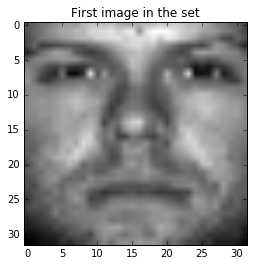

In [5]:
Y1 = get_face(fea[0])
plt.imshow(Y1, cmap='gray')
plt.title('First image in the set')

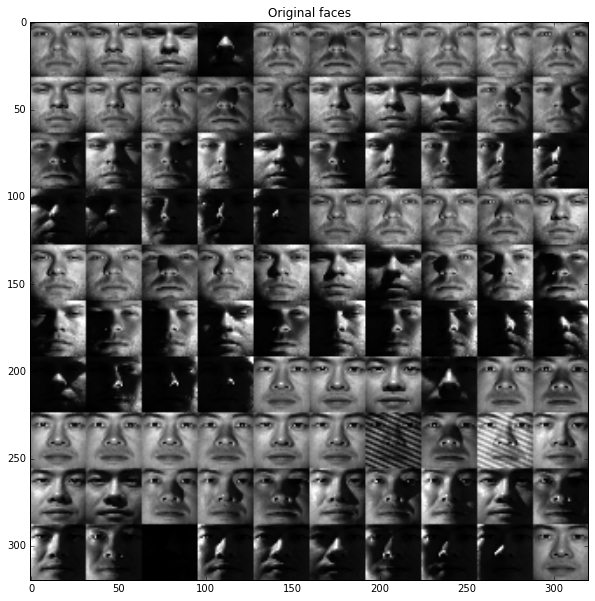

In [6]:
faces = combine_faces(fea, nrow=10, ncol=10)
plt.figure(figsize=(10, 10))
plt.imshow(faces, cmap='gray')
plt.title('Original faces')

In [7]:
kmax = 7
pca = utils.princomp(fea, kmax=kmax)

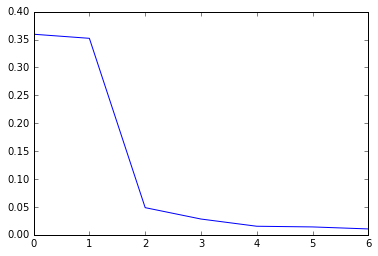

In [8]:
plt.plot(pca['varfrac'])

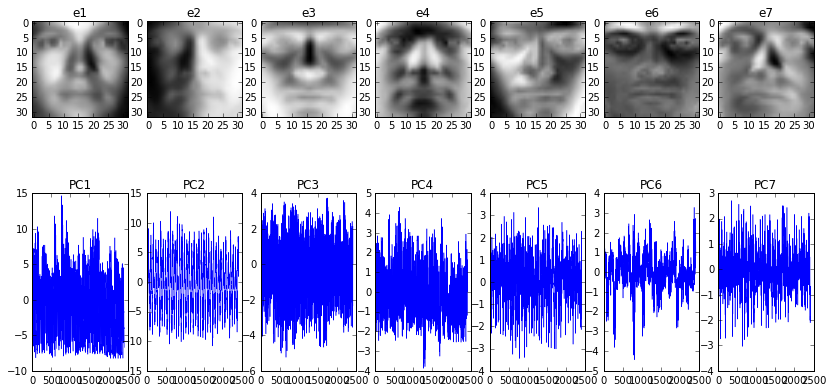

In [9]:
# Eigenfaces and PCs
plt.figure(figsize=(14, 7))
nr, nc = 2, kmax
for i in range(kmax):
    plt.subplot(nr, nc, i + 1)
    face = get_face(pca['eigvec'][i])
    plt.imshow(face, cmap='gray')
    plt.title('e%d' % (i + 1))
    plt.subplot(nr, nc, nc + i + 1)
    plt.plot(pca['scores'][:, i], linewidth=0.5)
    plt.title('PC%d' % (i + 1))

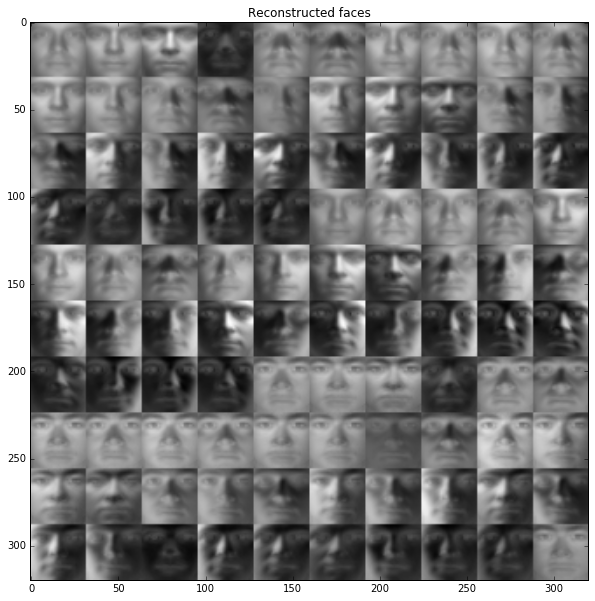

In [10]:
# Reconstructed faces
faces_rec = combine_faces(pca['y_rec'], nrow=10, ncol=10)
plt.figure(figsize=(10, 10))
plt.imshow(faces_rec, cmap='gray')
plt.title('Reconstructed faces')

2250

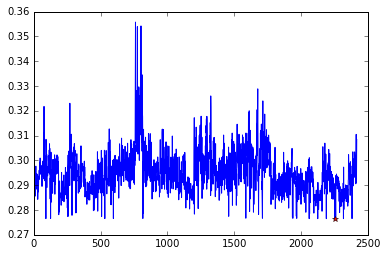

In [11]:
# What is the most 'generic' face in the set of images?
# finding the 'generic' face, i.e. the one with minimum RMSE
faceW, faceH = 32, 32
err = fea - pca['y_rec']
rmse = np.sqrt(np.sum((err ** 2).T, axis=0) / (faceW * faceH))
idx = np.argsort(rmse)
imin = idx[0]
plt.plot(rmse)
plt.plot(imin, rmse[imin], 'r*')
display(imin)

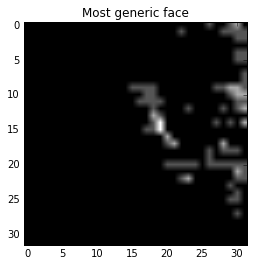

In [12]:
plt.imshow(get_face(fea[imin]), cmap='gray')
plt.title('Most generic face')

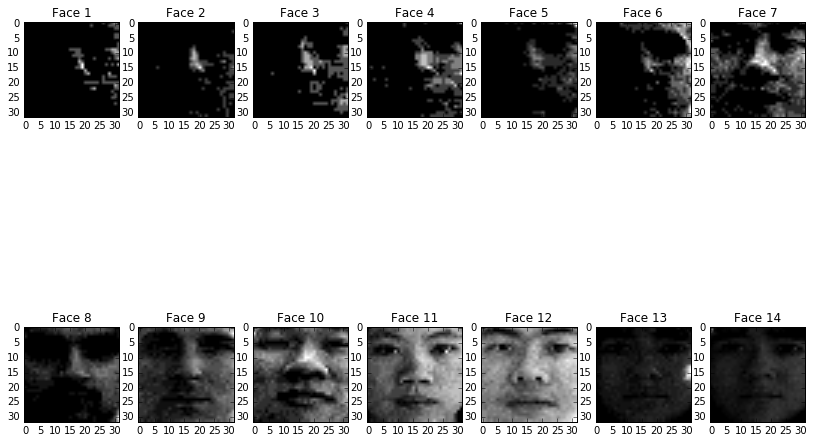

In [13]:
nr, nc = 2, 7
plt.figure(figsize=(14, 10))
for i in range(nr * nc):
    plt.subplot(nr, nc, i + 1)
    plt.imshow(get_face(fea[idx[i]]), cmap='gray')
    plt.title('Face %d' % (i + 1))

In [14]:
fea.shape

(2414L, 1024L)

In [15]:
pca['eigvec'].shape

(7L, 1024L)

In [16]:
pca['scores'].shape

(2414L, 7L)